<a href="https://colab.research.google.com/github/jrad9921/Data-Analysis/blob/main/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

# New section

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Reading the data

In [5]:
df = pd.read_csv('drive/MyDrive/PythonProjects_Data/loan.csv')

Exploratory Data Analysis

In [6]:
# Check the first five rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Find the number of rows and columns
df.shape 

(614, 13)

In [8]:
#Describe statistical quantites of each column
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Count number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Dropping the missing values
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization


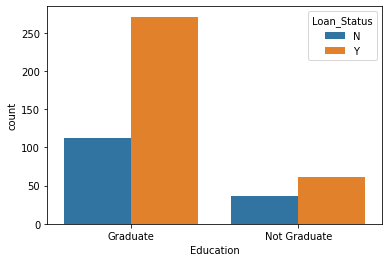

In [11]:
#Factor dependece of education on getting a loan
sns.countplot(x='Education', hue='Loan_Status', data=df)

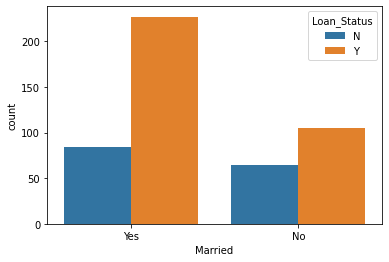

In [12]:
#Factor dependence of Marital status on getting a loan
sns.countplot(x='Married', hue='Loan_Status', data=df)

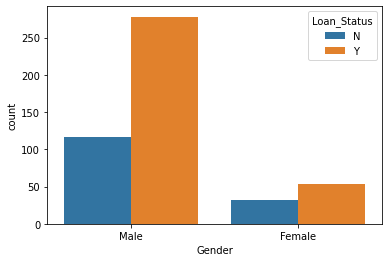

In [13]:
#Factor dependenec of Gender on getting a loan
sns.countplot(x='Gender', hue='Loan_Status', data=df)

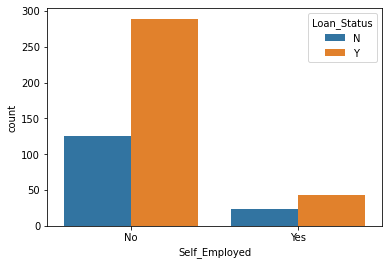

In [16]:
#Factor dependence of Employment on getting a loan
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

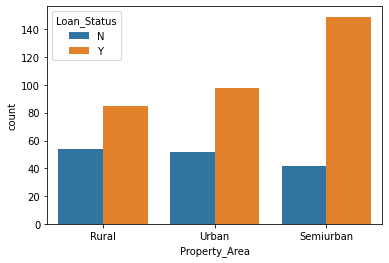

In [17]:
#Factor dependence of Property_Area on getting a loan
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

Label Encoding

In [18]:
# Replace using dictionary data frame
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)
# This can also be done by using label encoding function 

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
#Check how many values are there for each entry under 'Dependents'
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
#Replacing the value of 3+ to 4
df['Dependents'].replace({'3+': 4}, inplace=True)

In [22]:
#Now check the entries
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [23]:
df.replace({'Married':{'Yes':1, 'No':0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0},'Education':{'Graduate':1, 'Not Graduate':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)


In [24]:
df
# Now we have got all the categorical information in numerical form

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
#Loan Id is not useful to us, so drop it
# Seperate the data with the output label
x = df.drop(columns=['Loan_ID', 'Loan_Status'], axis = 1)
y = df['Loan_Status']

In [26]:
print(x, y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, stratify = y, random_state = 2)

In [28]:
print(x.shape, xtrain.shape, xtest.shape)

(480, 11) (432, 11) (48, 11)


Using the model: Support Vector Machine Model

In [29]:
classifier = svm.SVC(kernel= 'linear')

Training the model


In [30]:
classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

Model Evaluation

In [31]:
#accuracy score on training data
xtrain_prediction = classifier.predict(xtrain)
training_accuracy = accuracy_score(xtrain_prediction, ytrain)
print('Accuracy on training data is:', training_accuracy)

Accuracy on training data is: 0.7986111111111112


In [32]:
#accuracy score on test data
test_prediction = classifier.predict(xtest)
test_accuracy = accuracy_score(test_prediction, ytest)
print('Accuracy on test data is:', test_accuracy)

Accuracy on test data is: 0.8333333333333334


Making a Predictive System

In [56]:
input = (0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1)
input_array = np.asarray(input)
input_reshaped = input_array.reshape(1,-1)

prediction = classifier.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person is not granted loan")
else:
    print("The person is granted loan.")

[0]
The person is not granted loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
